## black friday dataset eda and feature engineering

# cleaning and preparing the data for model training
## a company wants to understand the costumer purchase behavior against various product

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#getting train dataset
df_train=pd.read_csv('train.csv')

In [3]:
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
df_train.shape

(550068, 12)

In [5]:
# getting test dataset
df_test=pd.read_csv('test.csv')

In [6]:
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [7]:
# now we will merge both test and train data to create full dataset
df=df_train.append(df_test)
df.head()

C:\Users\Pareshi Goel\AppData\Local\Temp\ipykernel_14960\2232671458.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df_train.append(df_test)


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


In [9]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,1.003029e+06,8.079300,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,6.522206,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [10]:
#user id is not useful,axis=1 (columnwise remove)
df.drop(['User_ID'],axis=1,inplace=True)

In [11]:
df

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0
...,...,...,...,...,...,...,...,...,...,...,...
233594,P00118942,F,26-35,15,B,4+,1,8,NaN,NaN,NaN
233595,P00254642,F,26-35,15,B,4+,1,5,8.0,NaN,NaN
233596,P00031842,F,26-35,15,B,4+,1,1,5.0,12.0,NaN
233597,P00124742,F,46-50,1,C,4+,0,10,16.0,NaN,NaN


In [12]:
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
dtype: int64

In [13]:
# to change categorical value into int type
#mapping or one hot encoder 
#one hot encoder we have to perform many other things like adding and dropping (pd.get_dummies)
#mapping
df['Gender']=df['Gender'].map({'F':0,'M':1})

In [14]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [15]:
# handle categorical feature
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [16]:
# or use label encoding
#df['Age']=df['Age'].map({'0-17':1,'8-25':2,'26-35':3,'36-45':4,'46-50':5,'51-55':6,'55+':7})
df_age=pd.get_dummies(df['Age'],drop_first=True)

In [17]:
df_age.head()

,18-25,26-35,36-45,46-50,51-55,55+
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,1


In [18]:
df=pd.concat([df,df_age],axis=1)
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,18-25,26-35,36-45,46-50,51-55,55+
0,P00069042,0,0-17,10,A,2,0,3,NaN,NaN,8370.0,0,0,0,0,0,0
1,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200.0,0,0,0,0,0,0
2,P00087842,0,0-17,10,A,2,0,12,NaN,NaN,1422.0,0,0,0,0,0,0
3,P00085442,0,0-17,10,A,2,0,12,14.0,NaN,1057.0,0,0,0,0,0,0
4,P00285442,1,55+,16,C,4+,0,8,NaN,NaN,7969.0,0,0,0,0,0,1


In [19]:
df.drop('Age',axis=1,inplace=True)

In [20]:
df

,Product_ID,Gender,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,18-25,26-35,36-45,46-50,51-55,55+
0,P00069042,0,10,A,2,0,3,NaN,NaN,8370.0,0,0,0,0,0,0
1,P00248942,0,10,A,2,0,1,6.0,14.0,15200.0,0,0,0,0,0,0
2,P00087842,0,10,A,2,0,12,NaN,NaN,1422.0,0,0,0,0,0,0
3,P00085442,0,10,A,2,0,12,14.0,NaN,1057.0,0,0,0,0,0,0
4,P00285442,1,16,C,4+,0,8,NaN,NaN,7969.0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233594,P00118942,0,15,B,4+,1,8,NaN,NaN,NaN,0,1,0,0,0,0
233595,P00254642,0,15,B,4+,1,5,8.0,NaN,NaN,0,1,0,0,0,0
233596,P00031842,0,15,B,4+,1,1,5.0,12.0,NaN,0,1,0,0,0,0
233597,P00124742,0,1,C,4+,0,10,16.0,NaN,NaN,0,0,0,1,0,0


In [21]:
#for city category(using one hot encoding)
#drop_first is used as we have 3 category so only two can be sufficient 
df_city=pd.get_dummies(df['City_Category'],drop_first=True)

In [22]:
df_city.head()

,B,C
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1


In [23]:
df=pd.concat([df,df_city],axis=1)
df.head()

,Product_ID,Gender,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,18-25,26-35,36-45,46-50,51-55,55+,B,C
0,P00069042,0,10,A,2,0,3,NaN,NaN,8370.0,0,0,0,0,0,0,0,0
1,P00248942,0,10,A,2,0,1,6.0,14.0,15200.0,0,0,0,0,0,0,0,0
2,P00087842,0,10,A,2,0,12,NaN,NaN,1422.0,0,0,0,0,0,0,0,0
3,P00085442,0,10,A,2,0,12,14.0,NaN,1057.0,0,0,0,0,0,0,0,0
4,P00285442,1,16,C,4+,0,8,NaN,NaN,7969.0,0,0,0,0,0,1,0,1


In [24]:
df.drop('City_Category',axis=1,inplace=True)

In [25]:
df

,Product_ID,Gender,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,18-25,26-35,36-45,46-50,51-55,55+,B,C
0,P00069042,0,10,2,0,3,NaN,NaN,8370.0,0,0,0,0,0,0,0,0
1,P00248942,0,10,2,0,1,6.0,14.0,15200.0,0,0,0,0,0,0,0,0
2,P00087842,0,10,2,0,12,NaN,NaN,1422.0,0,0,0,0,0,0,0,0
3,P00085442,0,10,2,0,12,14.0,NaN,1057.0,0,0,0,0,0,0,0,0
4,P00285442,1,16,4+,0,8,NaN,NaN,7969.0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233594,P00118942,0,15,4+,1,8,NaN,NaN,NaN,0,1,0,0,0,0,1,0
233595,P00254642,0,15,4+,1,5,8.0,NaN,NaN,0,1,0,0,0,0,1,0
233596,P00031842,0,15,4+,1,1,5.0,12.0,NaN,0,1,0,0,0,0,1,0
233597,P00124742,0,1,4+,0,10,16.0,NaN,NaN,0,0,0,1,0,0,0,1


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 17 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Occupation                  783667 non-null  int64  
 3   Stay_In_Current_City_Years  783667 non-null  object 
 4   Marital_Status              783667 non-null  int64  
 5   Product_Category_1          783667 non-null  int64  
 6   Product_Category_2          537685 non-null  float64
 7   Product_Category_3          237858 non-null  float64
 8   Purchase                    550068 non-null  float64
 9   18-25                       783667 non-null  uint8  
 10  26-35                       783667 non-null  uint8  
 11  36-45                       783667 non-null  uint8  
 12  46-50                       783667 non-null  uint8  
 13  51-55         

In [27]:
#Stay_In_Current_City_Years categorical value
df_stay=pd.get_dummies(df['Stay_In_Current_City_Years'],drop_first=True)

In [28]:
df=pd.concat([df,df_stay],axis=1)
df.head()

,Product_ID,Gender,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,18-25,...,36-45,46-50,51-55,55+,B,C,1,2,3,4+
0,P00069042,0,10,2,0,3,NaN,NaN,8370.0,0,...,0,0,0,0,0,0,0,1,0,0
1,P00248942,0,10,2,0,1,6.0,14.0,15200.0,0,...,0,0,0,0,0,0,0,1,0,0
2,P00087842,0,10,2,0,12,NaN,NaN,1422.0,0,...,0,0,0,0,0,0,0,1,0,0
3,P00085442,0,10,2,0,12,14.0,NaN,1057.0,0,...,0,0,0,0,0,0,0,1,0,0
4,P00285442,1,16,4+,0,8,NaN,NaN,7969.0,0,...,0,0,0,1,0,1,0,0,0,1


In [29]:
df.drop('Stay_In_Current_City_Years',axis=1,inplace=True)

In [30]:
df

,Product_ID,Gender,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,18-25,26-35,36-45,46-50,51-55,55+,B,C,1,2,3,4+
0,P00069042,0,10,0,3,NaN,NaN,8370.0,0,0,0,0,0,0,0,0,0,1,0,0
1,P00248942,0,10,0,1,6.0,14.0,15200.0,0,0,0,0,0,0,0,0,0,1,0,0
2,P00087842,0,10,0,12,NaN,NaN,1422.0,0,0,0,0,0,0,0,0,0,1,0,0
3,P00085442,0,10,0,12,14.0,NaN,1057.0,0,0,0,0,0,0,0,0,0,1,0,0
4,P00285442,1,16,0,8,NaN,NaN,7969.0,0,0,0,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233594,P00118942,0,15,1,8,NaN,NaN,NaN,0,1,0,0,0,0,1,0,0,0,0,1
233595,P00254642,0,15,1,5,8.0,NaN,NaN,0,1,0,0,0,0,1,0,0,0,0,1
233596,P00031842,0,15,1,1,5.0,12.0,NaN,0,1,0,0,0,0,1,0,0,0,0,1
233597,P00124742,0,1,0,10,16.0,NaN,NaN,0,0,0,1,0,0,0,1,0,0,0,1


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Product_ID          783667 non-null  object 
 1   Gender              783667 non-null  int64  
 2   Occupation          783667 non-null  int64  
 3   Marital_Status      783667 non-null  int64  
 4   Product_Category_1  783667 non-null  int64  
 5   Product_Category_2  537685 non-null  float64
 6   Product_Category_3  237858 non-null  float64
 7   Purchase            550068 non-null  float64
 8   18-25               783667 non-null  uint8  
 9   26-35               783667 non-null  uint8  
 10  36-45               783667 non-null  uint8  
 11  46-50               783667 non-null  uint8  
 12  51-55               783667 non-null  uint8  
 13  55+                 783667 non-null  uint8  
 14  B                   783667 non-null  uint8  
 15  C                   783667 non-nul

In [32]:
# missing values
df.isnull().sum()

Product_ID                 0
Gender                     0
Occupation                 0
Marital_Status             0
Product_Category_1         0
Product_Category_2    245982
Product_Category_3    545809
Purchase              233599
18-25                      0
26-35                      0
36-45                      0
46-50                      0
51-55                      0
55+                        0
B                          0
C                          0
1                          0
2                          0
3                          0
4+                         0
dtype: int64

In [33]:
# replace the missing value with mode
df['Product_Category_2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [34]:
df['Product_Category_2'].value_counts()

8.0     91317
14.0    78834
2.0     70498
16.0    61687
15.0    54114
5.0     37165
4.0     36705
6.0     23575
11.0    20230
17.0    19104
13.0    15054
9.0      8177
12.0     7801
10.0     4420
3.0      4123
18.0     4027
7.0       854
Name: Product_Category_2, dtype: int64

In [35]:
# replacing by mode
df['Product_Category_2']=df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0])

In [36]:
df['Product_Category_2'].isnull().sum()

0

In [37]:
# removing null for purchase3

df['Product_Category_3'].unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [38]:
df['Product_Category_3'].value_counts()

16.0    46469
15.0    39968
14.0    26283
17.0    23818
5.0     23799
8.0     17861
9.0     16532
12.0    13115
13.0     7849
6.0      6888
18.0     6621
4.0      2691
11.0     2585
10.0     2501
3.0       878
Name: Product_Category_3, dtype: int64

In [39]:
df['Product_Category_3']=df['Product_Category_3'].fillna(df['Product_Category_3'].mode()[0])

In [40]:
df['Product_Category_3'].isnull().sum()

0

In [41]:
df

,Product_ID,Gender,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,18-25,26-35,36-45,46-50,51-55,55+,B,C,1,2,3,4+
0,P00069042,0,10,0,3,8.0,16.0,8370.0,0,0,0,0,0,0,0,0,0,1,0,0
1,P00248942,0,10,0,1,6.0,14.0,15200.0,0,0,0,0,0,0,0,0,0,1,0,0
2,P00087842,0,10,0,12,8.0,16.0,1422.0,0,0,0,0,0,0,0,0,0,1,0,0
3,P00085442,0,10,0,12,14.0,16.0,1057.0,0,0,0,0,0,0,0,0,0,1,0,0
4,P00285442,1,16,0,8,8.0,16.0,7969.0,0,0,0,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233594,P00118942,0,15,1,8,8.0,16.0,NaN,0,1,0,0,0,0,1,0,0,0,0,1
233595,P00254642,0,15,1,5,8.0,16.0,NaN,0,1,0,0,0,0,1,0,0,0,0,1
233596,P00031842,0,15,1,1,5.0,12.0,NaN,0,1,0,0,0,0,1,0,0,0,0,1
233597,P00124742,0,1,0,10,16.0,16.0,NaN,0,0,0,1,0,0,0,1,0,0,0,1


In [42]:
#purchase is test data so it will remail null only
df.isnull().sum()

Product_ID                 0
Gender                     0
Occupation                 0
Marital_Status             0
Product_Category_1         0
Product_Category_2         0
Product_Category_3         0
Purchase              233599
18-25                      0
26-35                      0
36-45                      0
46-50                      0
51-55                      0
55+                        0
B                          0
C                          0
1                          0
2                          0
3                          0
4+                         0
dtype: int64

In [43]:
df['B']=df['B'].astype(int)
df['C']=df['C'].astype(int)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Product_ID          783667 non-null  object 
 1   Gender              783667 non-null  int64  
 2   Occupation          783667 non-null  int64  
 3   Marital_Status      783667 non-null  int64  
 4   Product_Category_1  783667 non-null  int64  
 5   Product_Category_2  783667 non-null  float64
 6   Product_Category_3  783667 non-null  float64
 7   Purchase            550068 non-null  float64
 8   18-25               783667 non-null  uint8  
 9   26-35               783667 non-null  uint8  
 10  36-45               783667 non-null  uint8  
 11  46-50               783667 non-null  uint8  
 12  51-55               783667 non-null  uint8  
 13  55+                 783667 non-null  uint8  
 14  B                   783667 non-null  int32  
 15  C                   783667 non-nul

In [99]:
##visualisation
## sns.pairplot(df)

C:\Users\Pareshi Goel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='Purchase'>

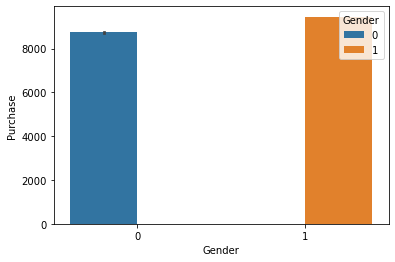

In [45]:
# visualisation of gender wrt purchase
# male purchase more 
sns.barplot('Gender','Purchase',hue='Gender',data=df)

C:\Users\Pareshi Goel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Occupation', ylabel='Purchase'>

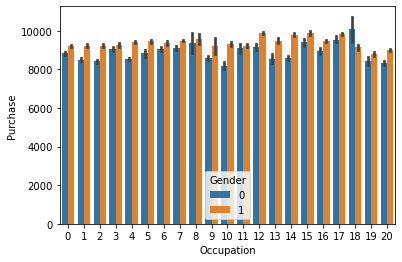

In [46]:
#purchase with occupation
sns.barplot('Occupation','Purchase',hue='Gender',data=df)

C:\Users\Pareshi Goel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category_1', ylabel='Purchase'>

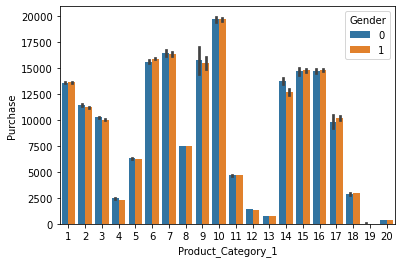

In [47]:
sns.barplot('Product_Category_1','Purchase',hue='Gender',data=df)

C:\Users\Pareshi Goel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category_2', ylabel='Purchase'>

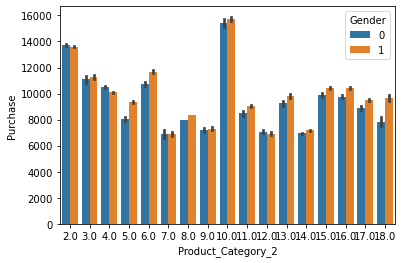

In [48]:
sns.barplot('Product_Category_2','Purchase',hue='Gender',data=df) 

C:\Users\Pareshi Goel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category_3', ylabel='Purchase'>

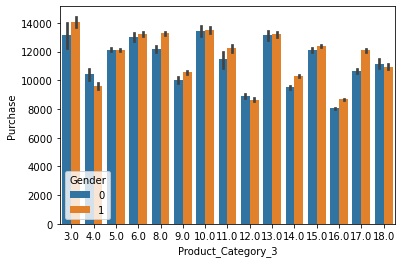

In [49]:
sns.barplot('Product_Category_3','Purchase',hue='Gender',data=df)

## product type 1 is purchased more

# Feature scaling

In [50]:
df_test=df[df['Purchase'].isnull()]#test data is null data

In [51]:
df_train=df[~df['Purchase'].isnull()]#train data is not null data

In [52]:
X=df_train.drop('Purchase',axis=1)

In [53]:
X.head()

,Product_ID,Gender,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,18-25,26-35,36-45,46-50,51-55,55+,B,C,1,2,3,4+
0,P00069042,0,10,0,3,8.0,16.0,0,0,0,0,0,0,0,0,0,1,0,0
1,P00248942,0,10,0,1,6.0,14.0,0,0,0,0,0,0,0,0,0,1,0,0
2,P00087842,0,10,0,12,8.0,16.0,0,0,0,0,0,0,0,0,0,1,0,0
3,P00085442,0,10,0,12,14.0,16.0,0,0,0,0,0,0,0,0,0,1,0,0
4,P00285442,1,16,0,8,8.0,16.0,0,0,0,0,0,1,0,1,0,0,0,1


In [54]:
X.shape

(550068, 19)

In [55]:
Y=df_train['Purchase']

In [56]:
Y.shape

(550068,)

In [57]:
Y

0          8370.0
1         15200.0
2          1422.0
3          1057.0
4          7969.0
           ...   
550063      368.0
550064      371.0
550065      137.0
550066      365.0
550067      490.0
Name: Purchase, Length: 550068, dtype: float64

In [58]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.33,random_state=42)

In [59]:
X_train.drop('Product_ID',axis=1,inplace=True)
X_test.drop('Product_ID',axis=1,inplace=True)

In [60]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(X_train)
x_test=sc.transform(X_test)